# Imports necessários


In [1]:
import pandas as pd
import numpy as np
import graphviz as gv

# Import dos dados

In [2]:
# features receitas
dados_receitas = pd.read_csv('03_dados_carga/arquivos_para_carga/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


In [3]:
# features despesas
dados_despesas = pd.read_csv('03_dados_carga/arquivos_para_carga/novos_dados_despesas.csv', sep=';')
dados_despesas.head()

,DATA_FATO,COD_DESPESA,CREDOR,NUM_DOCUMENTO,FONTE_RECURSO,ORGAO_INTERNO,ORGAO_VINCULADO,ELEMENTO,SUBELEMENTO,FUNCAO,SUBFUNCAO,NATUREZA,VALOR_FIXADO,VALOR_EMPENHADO,VALOR_LIQUIDADO,VALOR_PAGO,SALDO
0,2013-12-31,3300,alianca do brasil seguros s a,01.378.407/0001-10,recursos ordinarios,secretaria municipal de infra estrutura,prefeitura municipal,39.0,2044.0,4,122,3,2911694.0,5120.0,5120.0,0.0,5120.0
1,2013-12-31,3299,ademir santana da silva,***.893.004-**,recursos ordinarios,secretaria municipal de educacao,prefeitura municipal,36.0,2029.0,13,392,3,107000.0,6950.0,6950.0,0.0,6950.0
2,2013-12-31,3298,olindina glicia gomes pereira,***.859.974-**,recursos ordinarios,secretaria municipal de educacao,prefeitura municipal,36.0,2029.0,13,392,3,107000.0,800.0,800.0,0.0,800.0
3,2013-12-31,3297,taise kelly cezario de souza,***.039.644-**,recursos ordinarios,secretaria municipal de educacao,prefeitura municipal,36.0,2029.0,13,392,3,107000.0,400.0,400.0,0.0,400.0
4,2013-12-31,3296,otavio leoncio pereira,***.396.364-**,recursos ordinarios,secretaria municipal de educacao,prefeitura municipal,36.0,2029.0,13,392,3,107000.0,600.0,600.0,0.0,600.0


# Árvore de decisão

## Imports necessários

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

## Implementação do algoritmo

### 1. Previsão de Valores Arrecadados: 
<p>Podemos usar árvores de decisões para prever os valores arrecadados com base em outras variáveis, como a data, o código da receita ou a sua fonte. Isso pode ser útil para prever receitas futuras com base em padrões passados.</p>
<p>Utilizaremos uma porcentagem dos dados contidos no dataframe das receitas.</p>

In [5]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year
dados_receitas['MES'] = dados_receitas['DATA'].dt.month
dados_receitas['DIA'] = dados_receitas['DATA'].dt.day

In [6]:
dados_receitas.describe().round(2)

,COD_RECEITA,DATA,VALOR_ARRECADADO,ANO,MES,DIA
count,1.022930e+05,102293,102293.00,102293.00,102293.00,102293.00
mean,1.256925e+09,2017-11-11 13:19:10.635918336,12522.46,2017.34,6.70,17.50
min,1.112500e+08,2013-01-02 00:00:00,-2489288.55,2013.00,1.00,1.00
25%,1.113034e+09,2015-07-16 00:00:00,51.23,2015.00,4.00,10.00
50%,1.121250e+09,2017-10-13 00:00:00,240.60,2017.00,7.00,18.00
75%,1.325000e+09,2020-02-05 00:00:00,1579.25,2020.00,10.00,27.00
max,9.728013e+09,2022-12-30 00:00:00,4674330.00,2022.00,12.00,31.00
std,1.162115e+09,NaN,89618.73,2.71,3.47,9.53


<Axes: title={'center': 'VALOR_ARRECADADO'}, xlabel='[ANO]'>

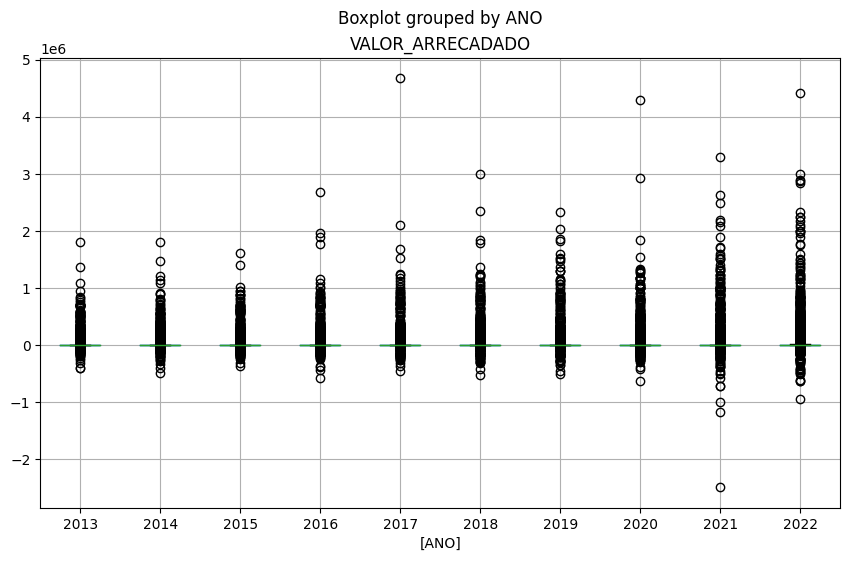

In [7]:
dados_box_plot = dados_receitas[['ANO', 'VALOR_ARRECADADO']]
dados_box_plot.boxplot(by='ANO', figsize=(10, 6))

<p>Remoção dos outliers</p>

Q1: 51.23
Q3: 1579.25
IQR: 1528.02
Limite inferior: -2240.7999999999997
Limite superior: 3871.2799999999997
Quantidade de registros sem outliers: 83736


<Axes: title={'center': 'VALOR_ARRECADADO'}, xlabel='[ANO]'>

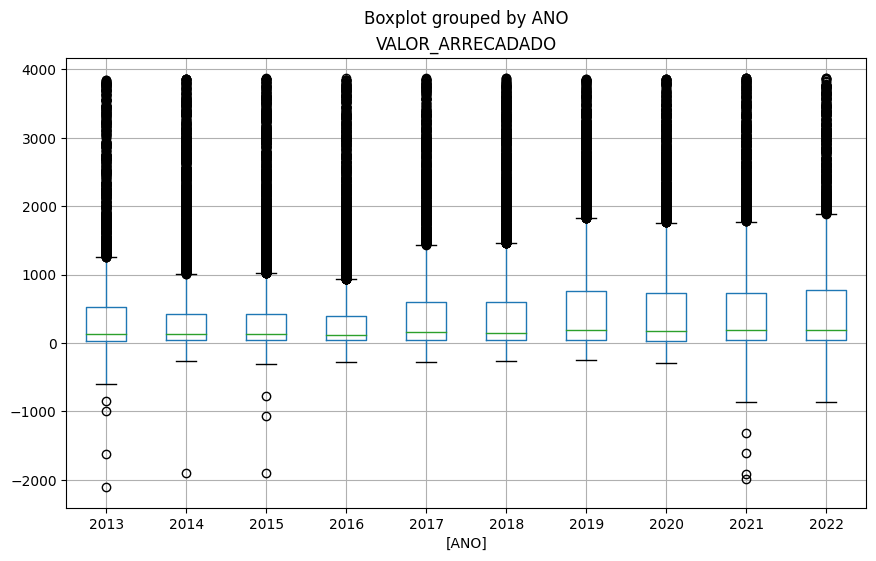

In [8]:
# aplicação de IQR - interquartile range
Q1 = dados_receitas['VALOR_ARRECADADO'].quantile(0.25)
Q3 = dados_receitas['VALOR_ARRECADADO'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')

df_sem_outliers = dados_receitas[(dados_receitas['VALOR_ARRECADADO'] >= limite_inferior) & (dados_receitas['VALOR_ARRECADADO'] <= limite_superior)]
df_sem_outliers = df_sem_outliers[['ANO', 'VALOR_ARRECADADO']]
print(f'Quantidade de registros sem outliers: {df_sem_outliers.shape[0]}')
df_sem_outliers.boxplot(by='ANO', figsize=(10, 6))

In [9]:
df_sem_outliers = dados_receitas[(dados_receitas['VALOR_ARRECADADO'] >= limite_inferior) & (dados_receitas['VALOR_ARRECADADO'] <= limite_superior)]

In [10]:
# Coluna pela qual você deseja amostrar proporcionalmente
coluna_amostragem = 'ANO'

# Porcentagem de amostras desejadas)
porcentagem_amostra = 0.05

# Divida o DataFrame em grupos com base na coluna de amostragem
grupos = df_sem_outliers.groupby(coluna_amostragem, group_keys=False, sort=False)

# Inicialize listas para armazenar os DataFrames de amostra e de não amostra
amostras = []
nao_amostras = []

# Para cada grupo, aplique o método sample com a porcentagem desejada
for nome_grupo, grupo in grupos:
    grupo_amostra = grupo.sample(frac=porcentagem_amostra)
    
    # Adicione o grupo de amostra à lista de amostras
    amostras.append(grupo_amostra)
    
    # Adicione o grupo de não amostra à lista de não amostras
    grupo_nao_amostra = grupo.drop(grupo_amostra.index)
    nao_amostras.append(grupo_nao_amostra)

# Crie um novo DataFrame contendo todas as amostras
df_amostrado = pd.concat(amostras)

# Crie um novo DataFrame contendo todos os dados que não entraram no sample
df_nao_amostrado = pd.concat(nao_amostras)

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [12]:
# Definir as features (recursos) e o alvo (target)
X = ['ANO', 'VALOR_ARRECADADO']
y = 'FONTE_DADOS'

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_amostrado[X], df_amostrado[y], test_size=0.2, random_state=42)

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador com os dados de treinamento
clf.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = clf.predict(X_test)

# Obter o número de nós da árvore
num_nodes = clf.tree_.node_count
print(f"Tamanho da árvore: {num_nodes} nós.")

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}%')

# Exibir o relatório de classificação
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:\n', report)

Tamanho da árvore: 941 nós.
Acurácia: 0.87%
Relatório de Classificação:
                                                precision    recall  f1-score   support

instituto de previdencia e assistencia social       0.07      0.06      0.06        17
                         prefeitura municipal       0.92      0.94      0.93       767
                                      sctrans       0.15      0.13      0.14        54

                                     accuracy                           0.87       838
                                    macro avg       0.38      0.37      0.38       838
                                 weighted avg       0.86      0.87      0.86       838



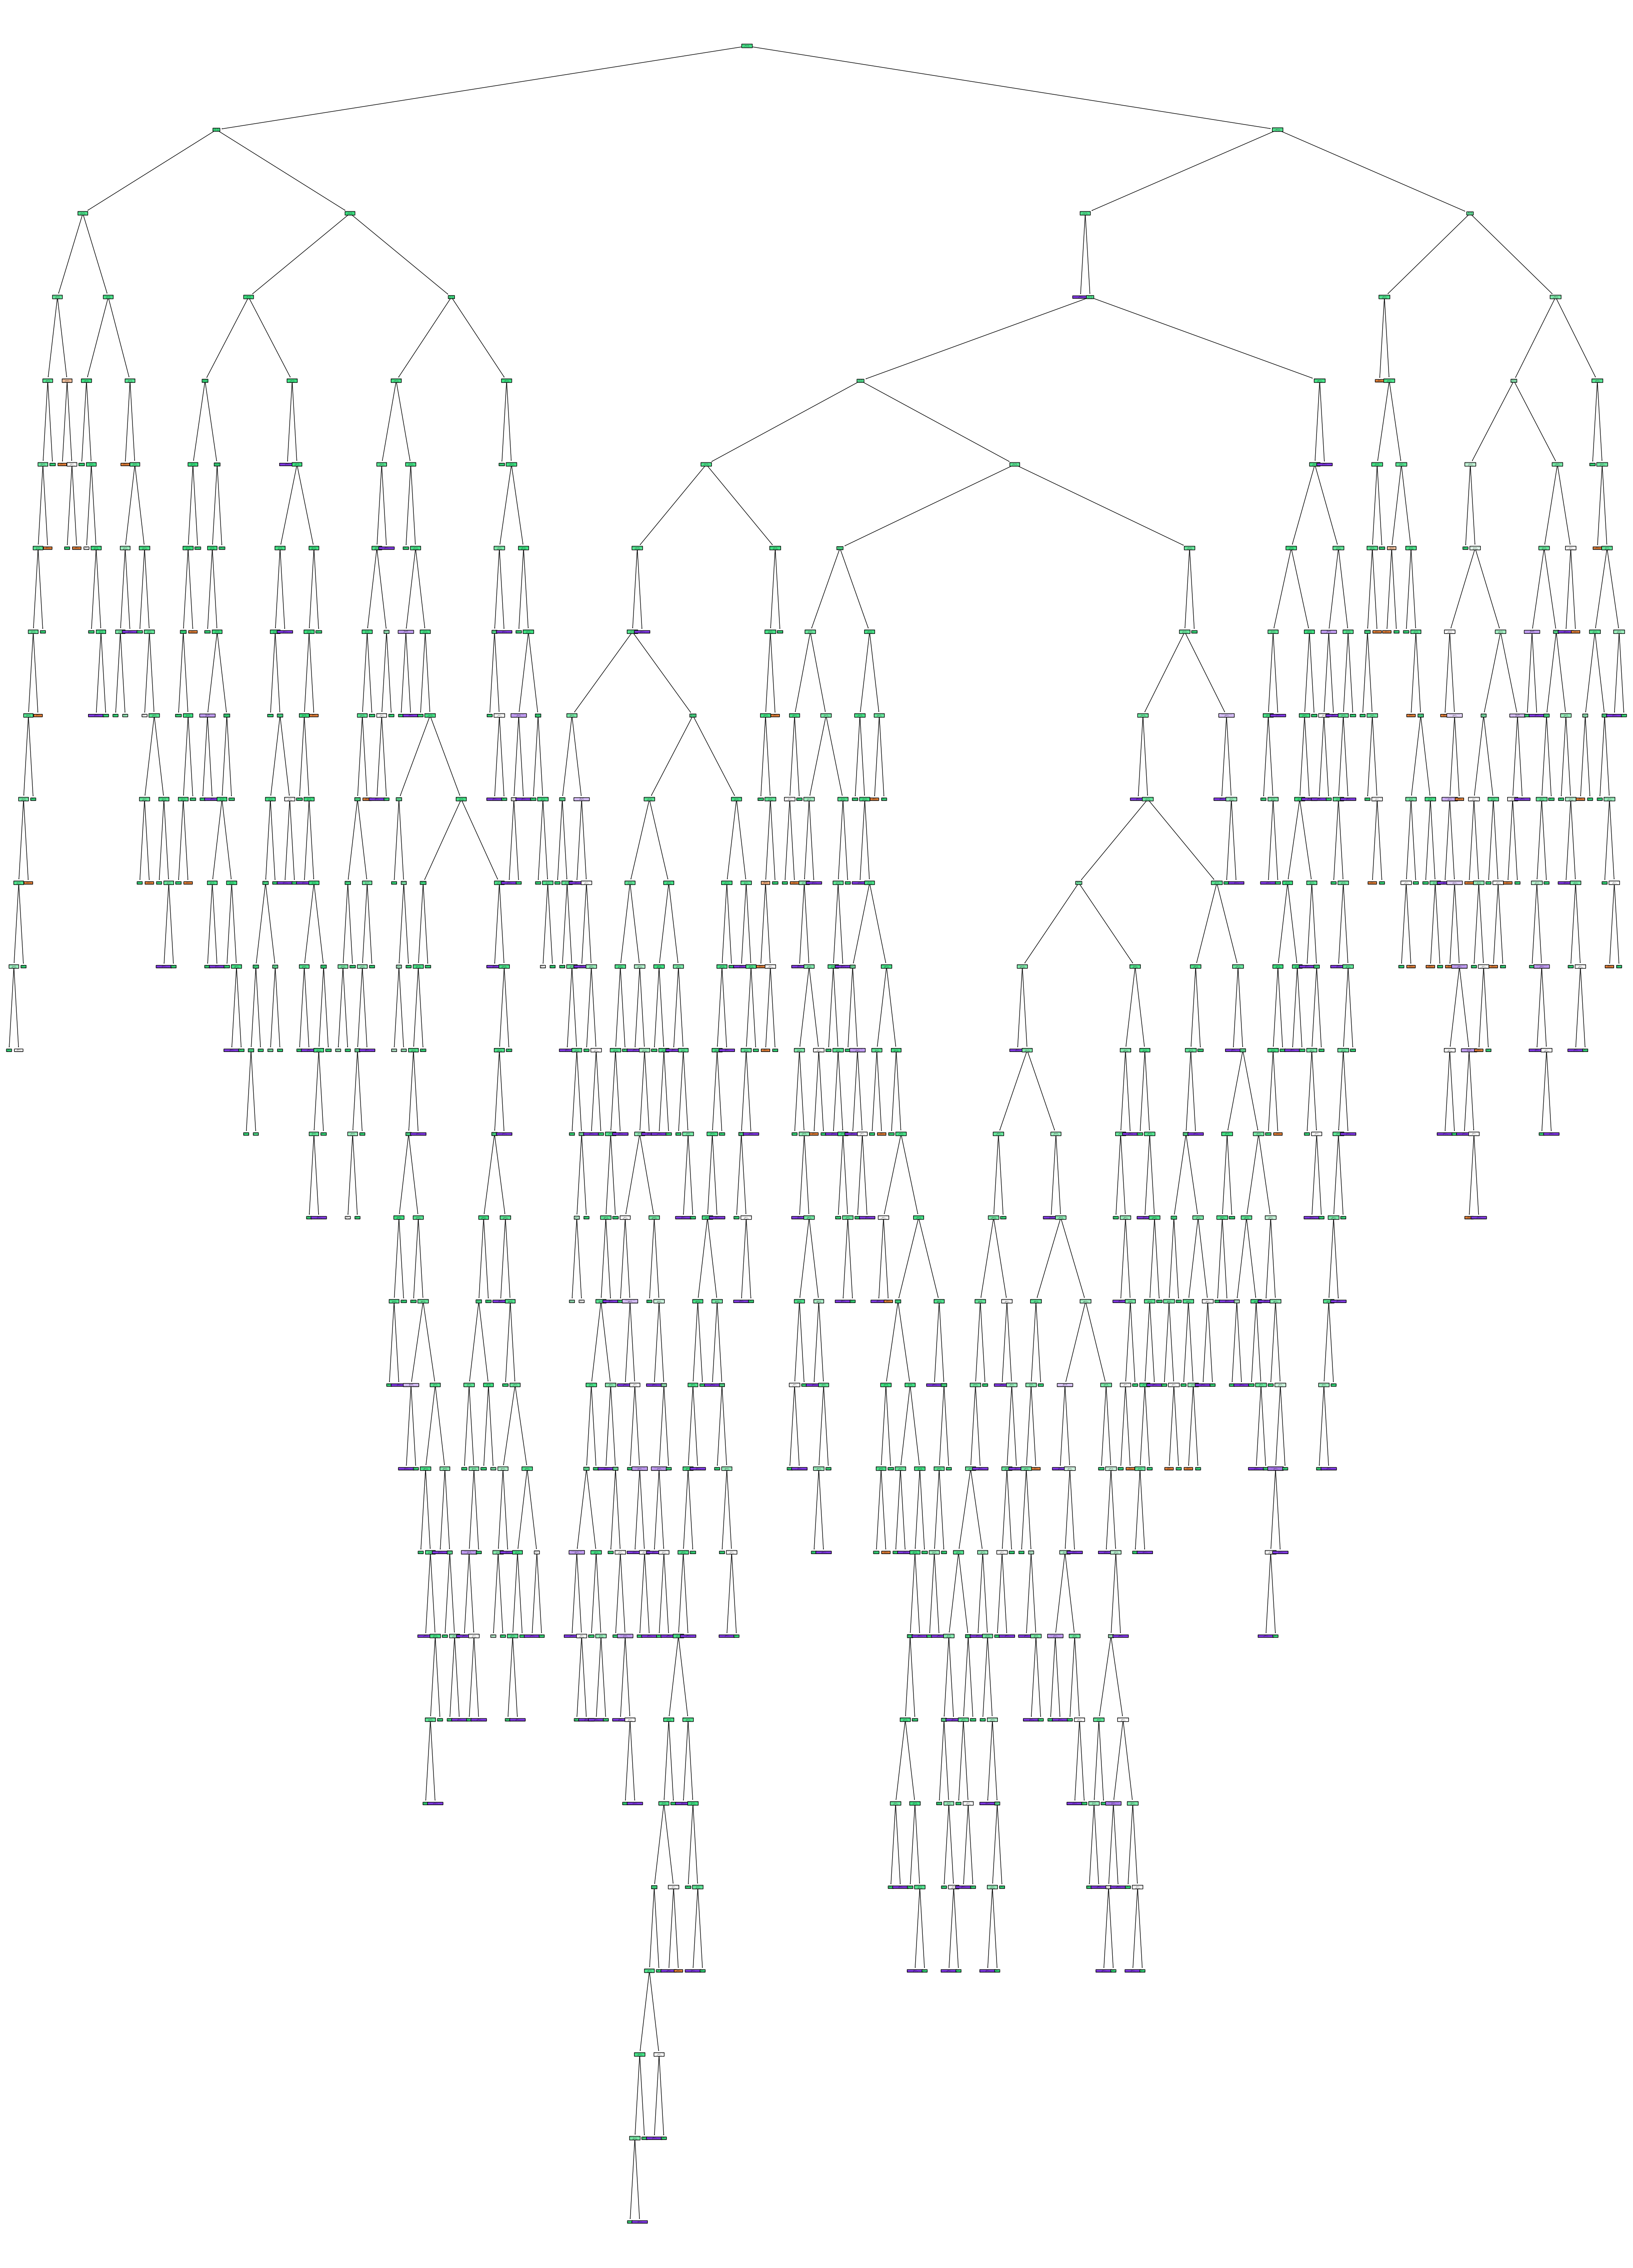

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,70))  # Ajuste o tamanho conforme necessário

# Converta o Index para uma lista de nomes de colunas
feature_names = list(df_amostrado[X].columns)

# Converta os valores únicos de y para uma lista
class_names = list(df_amostrado[y].unique())

plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df_amostrado[X].columns,
                                class_names=df_amostrado[y].unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data)
graph.render("arvore_decisao_fonte_dados")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year
dados_receitas['MES'] = dados_receitas['DATA'].dt.month
dados_receitas['DIA'] = dados_receitas['DATA'].dt.day

# Definir as features (recursos) e o alvo (target)
X = ['VALOR_ARRECADADO','ANO']
y = 'COD_RECEITA'

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados_receitas[X], dados_receitas[y], test_size=0.2, random_state=42)

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador com os dados de treinamento
clf.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = clf.predict(X_test)

# Obter o número de nós da árvore
num_nodes = clf.tree_.node_count
print(f"Tamanho da árvore: {num_nodes} nós.")

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}%')

# Exibir o relatório de classificação
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:\n', report)

Tamanho da árvore: 91115 nós.
Acurácia: 0.41%
Relatório de Classificação:
               precision    recall  f1-score   support

   111250011       0.18      0.19      0.19        62
   111250041       0.00      0.00      0.00         2
   111253011       0.26      0.27      0.26        26
   111303111       0.38      0.40      0.39       331
   111303411       0.00      0.00      0.00         3
   111451111       0.45      0.48      0.47       226
   111801111       0.07      0.07      0.07        29
   111801131       0.16      0.15      0.16        85
   111801411       0.45      0.51      0.48        68
   111802311       0.38      0.41      0.40       253
   112101011       0.27      0.24      0.26        66
   112101111       0.21      0.19      0.19        81
   112201011       0.00      0.00      0.00        17
   112201111       0.52      0.57      0.55        42
   113802111       0.00      0.00      0.00         1
   121501111       0.28      0.29      0.29        17
   121

c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [ ]:
# Definir as features (recursos) e o alvo (target)
X = dados_receitas[['COD_RECEITA','COD_FONTE_DADOS']]
y = dados_receitas['VALOR_ARRECADADO']

# Supondo que X contenha as características relevantes e y seja o valor arrecadado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine um modelo de regressão de árvore de decisão
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Faça previsões
y_pred = regressor.predict(X_test)

# Avalie o modelo usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)

Erro Quadrático Médio (MSE): 5469504231.71838


In [ ]:
import tensorflow as tf

# Criando um modelo sequencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

predictions = model.predict(X_test)

predictions

NameError: name 'input_dim' is not defined